# Project: Detect Parkinson's disease

In [23]:
import pandas as pd
parkinson_data = pd.read_csv('Parkinsson disease.csv')

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(parkinson_data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [22]:
 print(parkinson_data.dtypes)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


# Form and validate 3 hypothesis For eg: Null Hypothesis: NHR helps to determine if Parkinson disease is presen

In [9]:
nhr_parkinson = parkinson_data[parkinson_data['status'] == 1]['NHR']
nhr_no_parkinson = parkinson_data[parkinson_data['status'] == 0]['NHR']

# Perform t-test to compare means of NHR for the two groups
t_statistic, p_value = stats.ttest_ind(nhr_parkinson, nhr_no_parkinson)
print("Hypothesis 1: Null Hypothesis")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in NHR between individuals with and without Parkinson's disease")
else:
    print("Fail to reject null hypothesis: There is no significant difference in NHR between individuals with and without Parkinson's disease")


Hypothesis 1: Null Hypothesis
t-statistic: 2.680162257006514
p-value: 0.007994850518899753
Reject null hypothesis: There is a significant difference in NHR between individuals with and without Parkinson's disease


In [10]:
# Hypothesis 2: Alternative Hypothesis - NHR is higher in individuals with Parkinson's disease
# Compare means of NHR for individuals with and without Parkinson's disease
mean_nhr_parkinson = nhr_parkinson.mean()
mean_nhr_no_parkinson = nhr_no_parkinson.mean()
print("\nHypothesis 2: Alternative Hypothesis")
print("Mean NHR for individuals with Parkinson's disease:", mean_nhr_parkinson)
print("Mean NHR for individuals without Parkinson's disease:", mean_nhr_no_parkinson)
if mean_nhr_parkinson > mean_nhr_no_parkinson:
    print("Support for alternative hypothesis: Mean NHR is higher in individuals with Parkinson's disease")
else:
    print("No support for alternative hypothesis: Mean NHR is not higher in individuals with Parkinson's disease")


Hypothesis 2: Alternative Hypothesis
Mean NHR for individuals with Parkinson's disease: 0.029210952380952393
Mean NHR for individuals without Parkinson's disease: 0.011482708333333333
Support for alternative hypothesis: Mean NHR is higher in individuals with Parkinson's disease


In [11]:
# Hypothesis 3: Alternative Hypothesis - There is a correlation between NHR and Parkinson's disease
# Calculate correlation coefficient between NHR and Parkinson's disease
correlation_coefficient, p_value = stats.pearsonr(parkinson_data['NHR'], parkinson_data['status'])
print("\nHypothesis 3: Alternative Hypothesis")
print("Correlation Coefficient between NHR and Parkinson's disease:", correlation_coefficient)
if abs(correlation_coefficient) > 0.5:
    print("Strong correlation: NHR and Parkinson's disease are significantly correlated")
else:
    print("Weak correlation: NHR and Parkinson's disease are not significantly correlated")


Hypothesis 3: Alternative Hypothesis
Correlation Coefficient between NHR and Parkinson's disease: 0.18942931888728265
Weak correlation: NHR and Parkinson's disease are not significantly correlated


# Perform uni-variate Analysis and document the findings

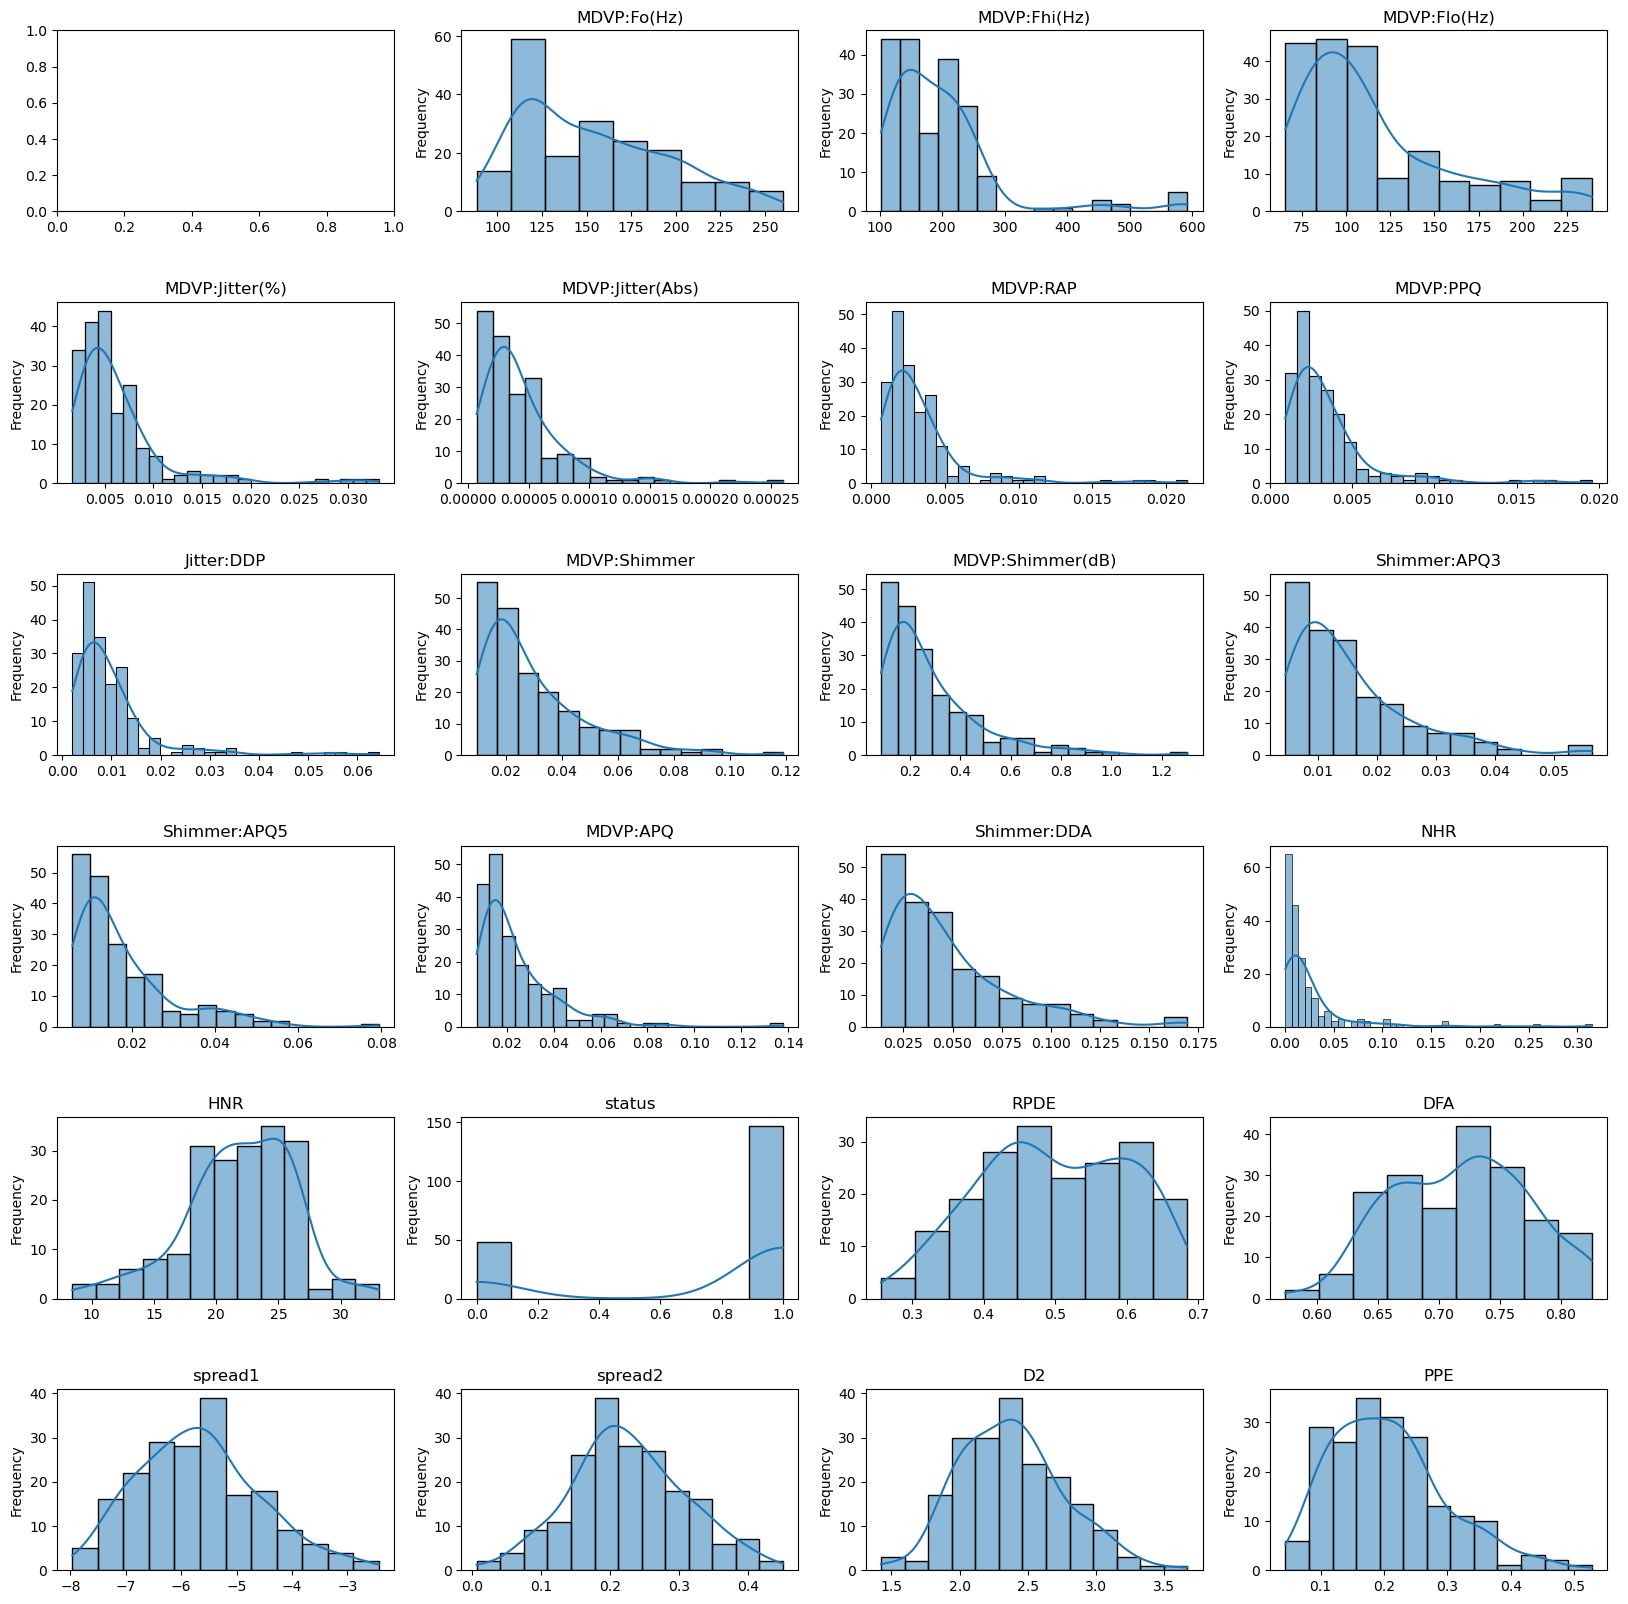

In [14]:
# Set up the figure and axis for plotting
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)

# Iterate through each column in the DataFrame
for i, col in enumerate(parkinson_data.columns):
    if col != 'name':  # Exclude 'name' column from analysis
        ax = axes[i // 4, i % 4]  # Get the corresponding axis for plotting
        sns.histplot(parkinson_data[col], ax=ax, kde=True)
        ax.set_title(col)  # Set the title of the subplot
        ax.set_xlabel('')  # Remove x-axis label for better readability
        ax.set_ylabel('Frequency')  # Set y-axis label
        
plt.show()

# Perform bi-variate Analysis of each feature with target and document the findings

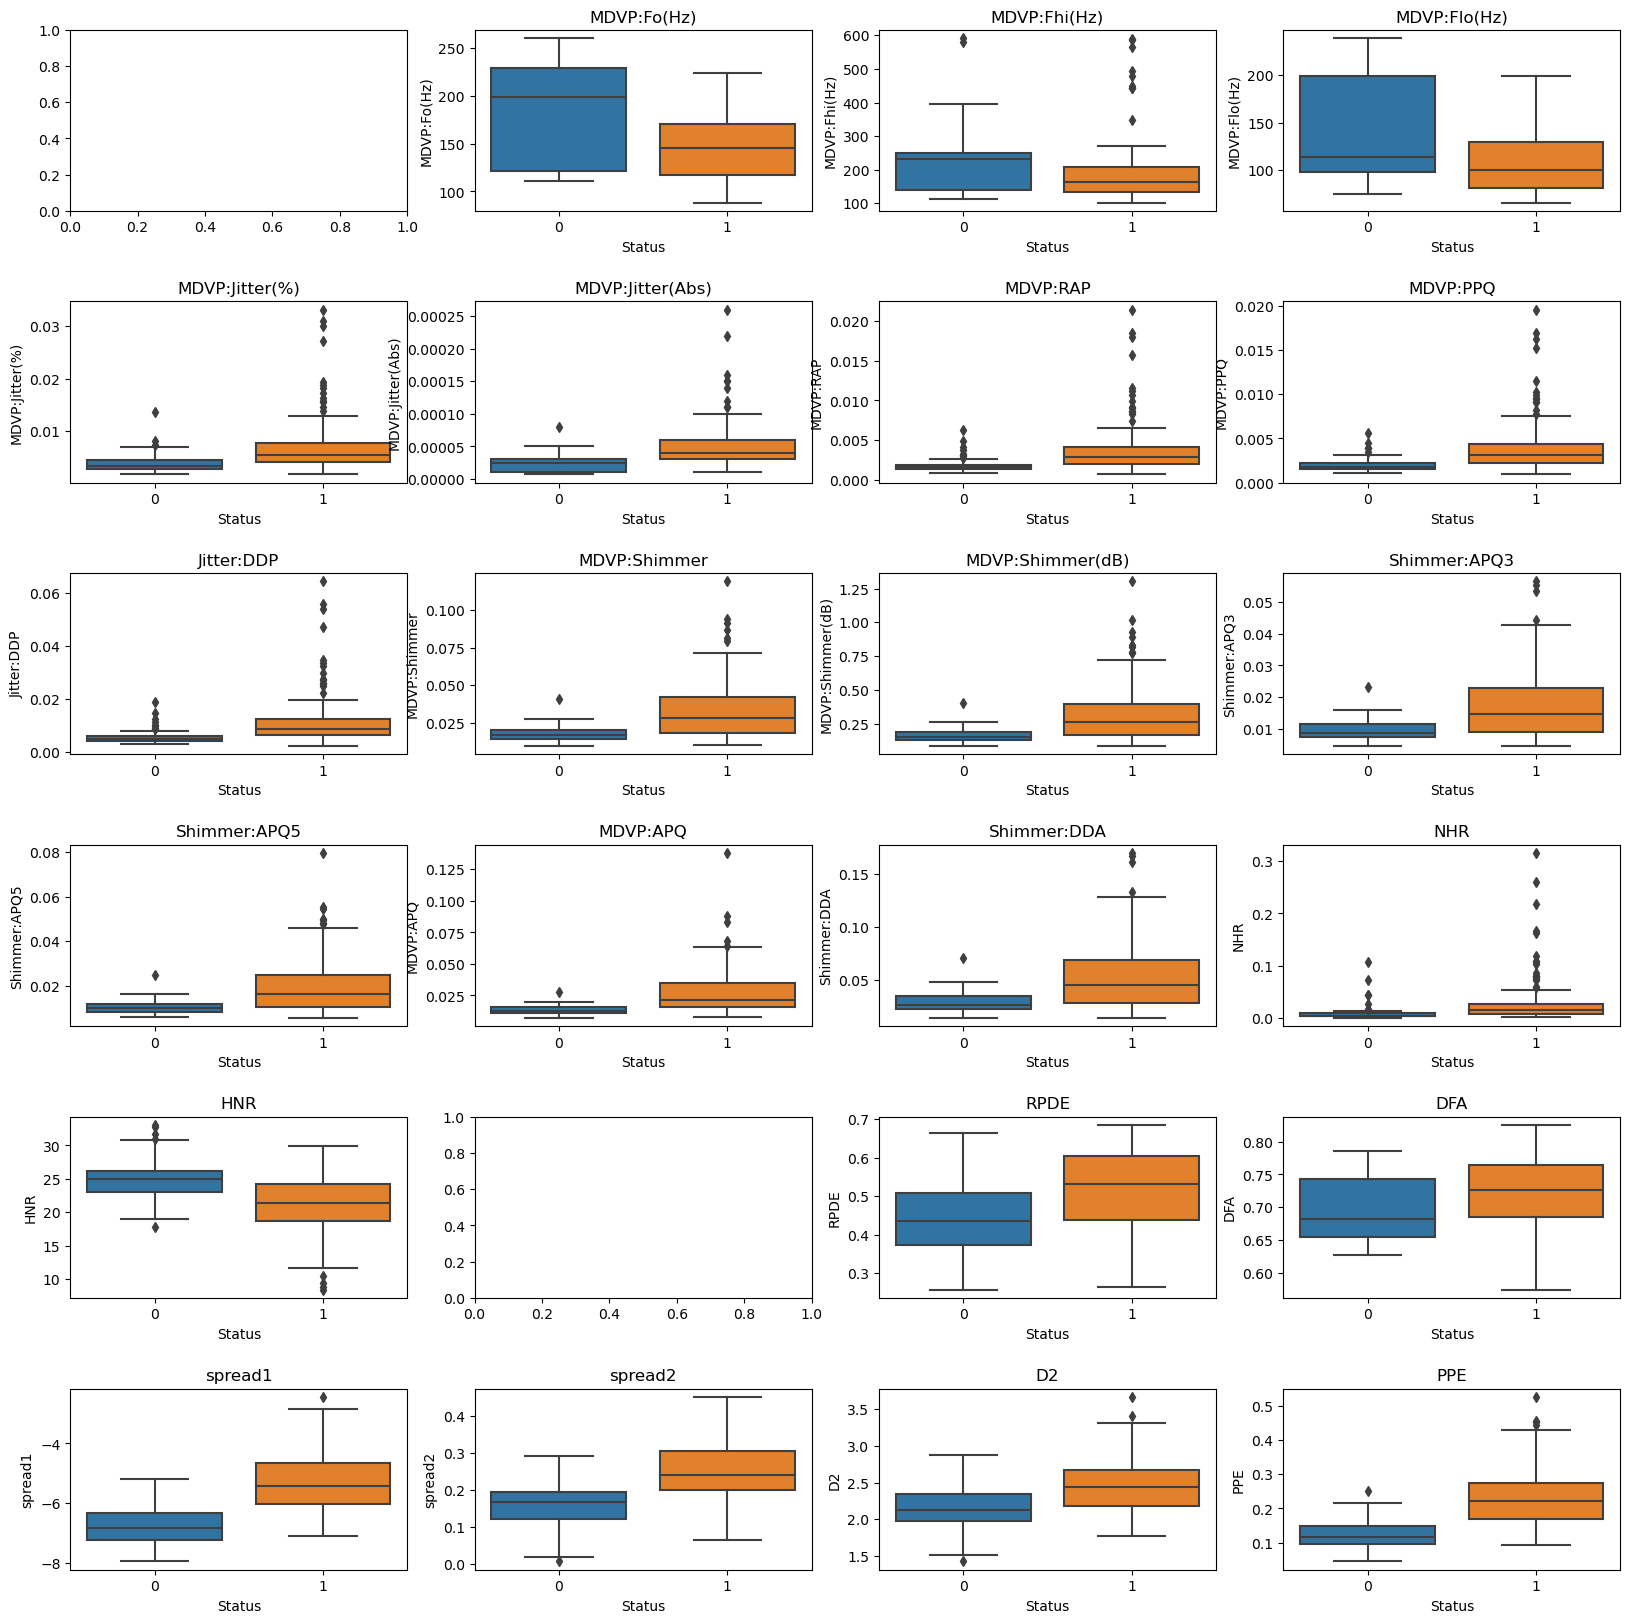

In [15]:
# Set up the figure and axis for plotting
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)

# Iterate through each column (except 'name' and 'status') in the DataFrame
for i, col in enumerate(parkinson_data.columns):
    if col != 'name' and col != 'status':
        ax = axes[i // 4, i % 4]  # Get the corresponding axis for plotting
        sns.boxplot(x='status', y=col, data=parkinson_data, ax=ax)
        ax.set_title(col)  # Set the title of the subplot
        ax.set_xlabel('Status')  # Set x-axis label
        ax.set_ylabel(col)  # Set y-axis label
        
plt.show()


# Perform Scaling and Normalisation for all columns

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Separate features from the target variable
X = parkinson_data.drop(columns=['status', 'name'])  # Features
y = parkinson_data['status']  # Target variable

# Initialize StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Perform Standard Scaling
X_standard_scaled = scaler_standard.fit_transform(X)

# Perform Min-Max Scaling
X_minmax_scaled = scaler_minmax.fit_transform(X)

# Convert the scaled arrays back to DataFrame
X_standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Display the scaled DataFrame
print("Standard Scaled DataFrame:")
print(X_standard_scaled_df.head())

print("\nMin-Max Scaled DataFrame:")
print(X_minmax_scaled_df.head())

Standard Scaled DataFrame:
   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR   

# Build a base classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features from the target variable
X = parkinson_data.drop(columns=['status', 'name'])  # Features
y = parkinson_data['status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the base classifier (Logistic Regression)
base_classifier = LogisticRegression(random_state=42)
base_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = base_classifier.predict(X_test)

# Evaluate the performance of the base classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8974358974358975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


Confusion Matrix:
[[ 3  4]
 [ 0 32]]


C:\Users\P HEMANTH\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Build multiple classifiers and compare performance to chose the best classifier


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Assuming you have a DataFrame named 'parkinson_data' with columns including features and 'status' as the target variable

# Separate features from the target variable
X = parkinson_data.drop(columns=['status', 'name'])  # Features
y = parkinson_data['status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Classifier:")
    print("Accuracy:", accuracy)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


C:\Users\P HEMANTH\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classifier:
Accuracy: 0.8974358974358975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


Confusion Matrix:
[[ 3  4]
 [ 0 32]]

Decision Tree Classifier:
Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39


Confusion Matrix:
[[ 5  2]
 [ 1 31]]

Random Forest Classifier:
Accuracy: 0.9487179487179487

Classification Report:
              precision 

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Load the dataset and separate features from the target variable

# Split the data into training and testing sets

# Define a pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8974358974358975


# Perform hyperparameter tuning to select the best set of Hyper parameters

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Assuming you have a DataFrame named 'parkinson_data' with columns including features and 'status' as the target variable

# Separate features from the target variable
X = parkinson_data.drop(columns=['status', 'name'])  # Features
y = parkinson_data['status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Model:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9487179487179487

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Confusion Matrix:
[[ 5  2]
 [ 0 32]]
